In [1]:
# Student Academic Performance Analysis
# Comprehensive Statistical Analysis for Scientific Article

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, pearsonr, normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# Load the dataset
df = pd.read_csv('data/student_info.csv')

In [9]:
print(f"\nDataset loaded successfully!")
print(f"Original dataset shape: {df.shape}")


Dataset loaded successfully!
Original dataset shape: (1000, 15)


In [11]:
# Display basic information about the dataset
print("\n=== DATASET OVERVIEW ===")
print("\nFirst 5 rows:")
print(df.head())


=== DATASET OVERVIEW ===

First 5 rows:
  student_id       name gender  age  grade_level  math_score  reading_score  \
0         S1  Student_1  Other   17           10          74             61   
1         S2  Student_2   Male   17           12          99             70   
2         S3  Student_3  Other   17            9          59             60   
3         S4  Student_4  Other   17           12          70             88   
4         S5  Student_5   Male   15            9          85             77   

   writing_score  attendance_rate parent_education  study_hours  \
0             90        94.660002         Master's     4.120192   
1             91        93.173227       Bachelor's     2.886505   
2             99        98.631098              PhD     1.909926   
3             69        96.419620              PhD     1.664740   
4             94        91.332105              PhD     2.330918   

  internet_access       lunch_type extra_activities final_result  
0             

In [13]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB
None


In [15]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               age  grade_level   math_score  reading_score  writing_score  \
count  1000.000000  1000.000000  1000.000000    1000.000000    1000.000000   
mean     15.999000    10.473000    75.165000      74.293000      75.150000   
std       0.817109     1.136029    14.304349      14.312652      14.395094   
min      15.000000     9.000000    50.000000      50.000000      50.000000   
25%      15.000000     9.000000    63.000000      62.000000      63.000000   
50%      16.000000    10.000000    75.000000      74.000000      75.000000   
75%      17.000000    12.000000    88.000000      86.000000      88.000000   
max      17.000000    12.000000    99.000000      99.000000      99.000000   

       attendance_rate  study_hours  
count      1000.000000  1000.000000  
mean         89.879179     2.978380  
std           5.725007     1.167780  
min          80.000614     1.015673  
25%          84.971772     1.955287  
50%          89.980889     2.962665  
75%       

In [17]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
student_id          0
name                0
gender              0
age                 0
grade_level         0
math_score          0
reading_score       0
writing_score       0
attendance_rate     0
parent_education    0
study_hours         0
internet_access     0
lunch_type          0
extra_activities    0
final_result        0
dtype: int64


In [19]:
# Data preprocessing and cleaning
print("\n=== DATA PREPROCESSING ===")


=== DATA PREPROCESSING ===


In [21]:
# Remove any duplicate rows
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (1000, 15)


In [23]:
# Handle missing values if any
df = df.dropna()

In [25]:
# Create binary target variable for final result
df['success'] = (df['final_result'] == 'Pass').astype(int)

In [27]:
# Select key columns for analysis (based on the provided image)
key_columns = [
    'gender', 'age', 'grade_level', 'math_score', 'reading_score', 
    'writing_score', 'attendance', 'parent_education', 'study_hours', 
    'internet_access', 'lunch_type', 'extracurricular', 'final_result', 'success'
]

In [29]:
# Keep only existing columns
available_columns = [col for col in key_columns if col in df.columns]
df_analysis = df[available_columns].copy()

In [31]:
print(f"Selected {len(available_columns)} columns for analysis")
print(f"Final dataset shape: {df_analysis.shape}")

Selected 12 columns for analysis
Final dataset shape: (1000, 12)


In [33]:
# Create numerical encodings for categorical variables
le_dict = {}
categorical_cols = ['gender', 'parent_education', 'internet_access', 'lunch_type', 'extracurricular']

In [35]:
for col in categorical_cols:
    if col in df_analysis.columns:
        le_dict[col] = LabelEncoder()
        df_analysis[f'{col}_encoded'] = le_dict[col].fit_transform(df_analysis[col])

In [37]:
print("\n=== EXPLORATORY DATA ANALYSIS ===")


=== EXPLORATORY DATA ANALYSIS ===


In [39]:
# 1. Distribution of Final Results
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Final Results')

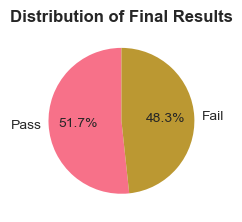

In [40]:
plt.subplot(2, 3, 1)
result_counts = df_analysis['final_result'].value_counts()
plt.pie(result_counts.values, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Final Results', fontsize=12, fontweight='bold')

(array([1, 2, 3]),
 [Text(1, 0, 'Math Score'),
  Text(2, 0, 'Reading Score'),
  Text(3, 0, 'Writing Score')])

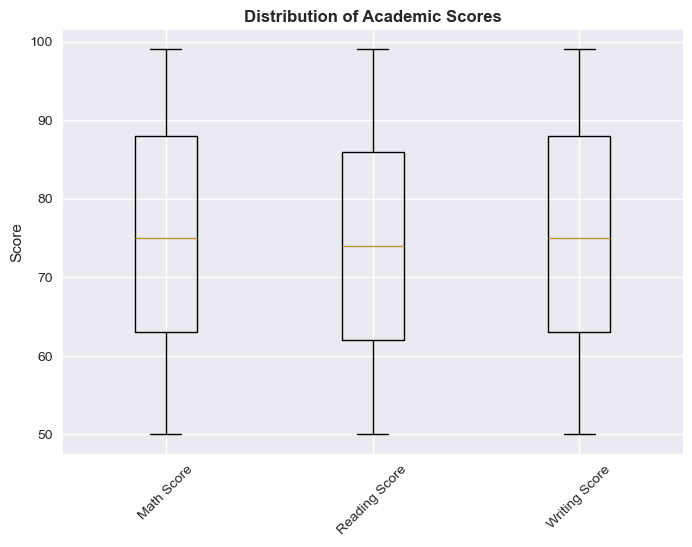

In [42]:
# 2. Academic Scores Distribution
scores = ['math_score', 'reading_score', 'writing_score']
score_data = [df_analysis[score].dropna() for score in scores if score in df_analysis.columns]
score_labels = [score.replace('_', ' ').title() for score in scores if score in df_analysis.columns]
plt.boxplot(score_data, labels=score_labels)
plt.title('Distribution of Academic Scores', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=45)


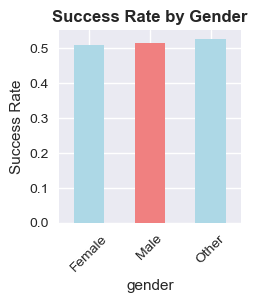

In [43]:
# 3. Gender vs Success Rate
if 'gender' in df_analysis.columns:
    plt.subplot(2, 3, 3)
    gender_success = df_analysis.groupby('gender')['success'].mean()
    gender_success.plot(kind='bar', color=['lightblue', 'lightcoral'])
    plt.title('Success Rate by Gender', fontsize=12, fontweight='bold')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)

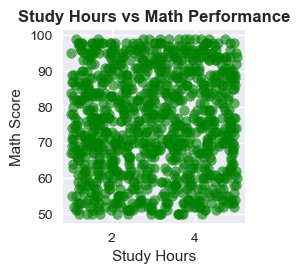

In [45]:
# 4. Study Hours vs Performance
if 'study_hours' in df_analysis.columns:
    plt.subplot(2, 3, 4)
    plt.scatter(df_analysis['study_hours'], df_analysis['math_score'], alpha=0.6, color='green')
    plt.xlabel('Study Hours')
    plt.ylabel('Math Score')
    plt.title('Study Hours vs Math Performance', fontsize=12, fontweight='bold')

In [46]:
# 5. Attendance vs Success
if 'attendance' in df_analysis.columns:
    plt.subplot(2, 3, 5)
    plt.scatter(df_analysis['attendance'], df_analysis['success'], alpha=0.6, color='orange')
    plt.xlabel('Attendance (%)')
    plt.ylabel('Success (0=Fail, 1=Pass)')
    plt.title('Attendance vs Academic Success', fontsize=12, fontweight='bold')

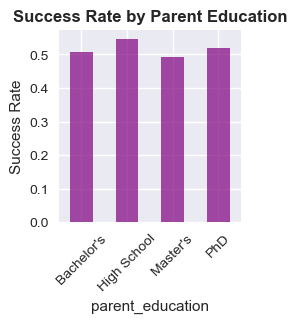

In [47]:
# 6. Parent Education Impact
if 'parent_education' in df_analysis.columns:
    plt.subplot(2, 3, 6)
    parent_ed_success = df_analysis.groupby('parent_education')['success'].mean()
    parent_ed_success.plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Success Rate by Parent Education', fontsize=12, fontweight='bold')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=45)

In [49]:
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [50]:
# Additional detailed visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

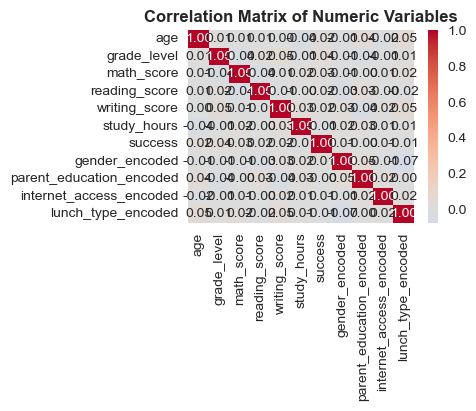

In [51]:
# Correlation heatmap
plt.subplot(2, 2, 1)
numeric_cols = df_analysis.select_dtypes(include=[np.number]).columns
correlation_matrix = df_analysis[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables', fontsize=12, fontweight='bold')

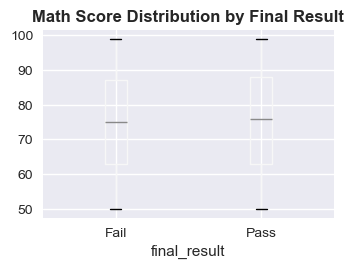

In [53]:
# Score distributions by success
plt.subplot(2, 2, 2)
if 'math_score' in df_analysis.columns:
    df_analysis.boxplot(column='math_score', by='final_result', ax=plt.gca())
    plt.title('Math Score Distribution by Final Result', fontsize=12, fontweight='bold')
    plt.suptitle('')

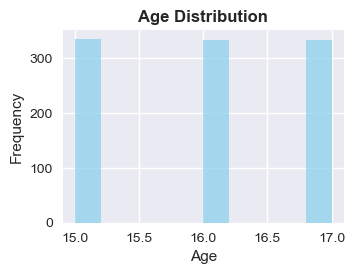

In [54]:
# Age distribution
plt.subplot(2, 2, 3)
if 'age' in df_analysis.columns:
    df_analysis['age'].hist(bins=10, alpha=0.7, color='skyblue')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution', fontsize=12, fontweight='bold')

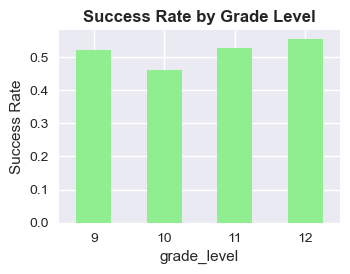

In [55]:
# Grade level analysis
plt.subplot(2, 2, 4)
if 'grade_level' in df_analysis.columns:
    grade_success = df_analysis.groupby('grade_level')['success'].mean()
    grade_success.plot(kind='bar', color='lightgreen')
    plt.title('Success Rate by Grade Level', fontsize=12, fontweight='bold')
    plt.ylabel('Success Rate')
    plt.xticks(rotation=0)

In [58]:
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [59]:
print("\n=== STATISTICAL HYPOTHESIS TESTING ===")


=== STATISTICAL HYPOTHESIS TESTING ===


In [60]:
# Hypothesis 1: Gender differences in academic performance
print("\n1. HYPOTHESIS TEST: Gender Differences in Math Performance")
if 'gender' in df_analysis.columns and 'math_score' in df_analysis.columns:
    male_scores = df_analysis[df_analysis['gender'] == 'Male']['math_score'].dropna()
    female_scores = df_analysis[df_analysis['gender'] == 'Female']['math_score'].dropna()
    
    # Two-sample t-test
    t_stat, p_value = ttest_ind(male_scores, female_scores)
    
    print(f"Male Math Score - Mean: {male_scores.mean():.2f}, Std: {male_scores.std():.2f}")
    print(f"Female Math Score - Mean: {female_scores.mean():.2f}, Std: {female_scores.std():.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance level (α = 0.05): {'Significant' if p_value < 0.05 else 'Not Significant'}")


1. HYPOTHESIS TEST: Gender Differences in Math Performance
Male Math Score - Mean: 76.77, Std: 14.12
Female Math Score - Mean: 74.42, Std: 14.39
T-statistic: 2.1515
P-value: 0.0318
Significance level (α = 0.05): Significant


In [64]:
# Hypothesis 2: Parent education impact on success
print("\n2. HYPOTHESIS TEST: Parent Education Impact on Success")
if 'parent_education' in df_analysis.columns:
    contingency_table = pd.crosstab(df_analysis['parent_education'], df_analysis['final_result'])
    print("\nContingency Table:")
    print(contingency_table)
    
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Significance level (α = 0.05): {'Significant' if p_val < 0.05 else 'Not Significant'}")


2. HYPOTHESIS TEST: Parent Education Impact on Success

Contingency Table:
final_result      Fail  Pass
parent_education            
Bachelor's         135   139
High School        111   134
Master's           115   112
PhD                122   132

Chi-square statistic: 1.4967
P-value: 0.6830
Degrees of freedom: 3
Significance level (α = 0.05): Not Significant


In [65]:
# Hypothesis 3: Study hours effect on performance
print("\n3. HYPOTHESIS TEST: Study Hours Correlation with Performance")
if 'study_hours' in df_analysis.columns and 'math_score' in df_analysis.columns:
    correlation, p_val = pearsonr(df_analysis['study_hours'].dropna(), 
                                 df_analysis['math_score'].dropna())
    print(f"Pearson correlation coefficient: {correlation:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Significance level (α = 0.05): {'Significant' if p_val < 0.05 else 'Not Significant'}")


3. HYPOTHESIS TEST: Study Hours Correlation with Performance
Pearson correlation coefficient: 0.0214
P-value: 0.4998
Significance level (α = 0.05): Not Significant


In [66]:
# Hypothesis 4: ANOVA test for grade level differences
print("\n4. HYPOTHESIS TEST: Grade Level Differences in Performance (ANOVA)")
if 'grade_level' in df_analysis.columns and 'math_score' in df_analysis.columns:
    grade_groups = [group['math_score'].dropna() for name, group in df_analysis.groupby('grade_level')]
    f_stat, p_val = f_oneway(*grade_groups)
    
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Significance level (α = 0.05): {'Significant' if p_val < 0.05 else 'Not Significant'}")


4. HYPOTHESIS TEST: Grade Level Differences in Performance (ANOVA)
F-statistic: 0.9746
P-value: 0.4040
Significance level (α = 0.05): Not Significant


In [67]:
# Normality tests
print("\n5. NORMALITY TESTS")
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'attendance']
for col in numeric_columns:
    if col in df_analysis.columns:
        stat, p_val = normaltest(df_analysis[col].dropna())
        print(f"{col}: D'Agostino normality test p-value = {p_val:.4f}")
        print(f"  Distribution is {'Normal' if p_val > 0.05 else 'Not Normal'} (α = 0.05)")


5. NORMALITY TESTS
math_score: D'Agostino normality test p-value = 0.0000
  Distribution is Not Normal (α = 0.05)
reading_score: D'Agostino normality test p-value = 0.0000
  Distribution is Not Normal (α = 0.05)
writing_score: D'Agostino normality test p-value = 0.0000
  Distribution is Not Normal (α = 0.05)


In [68]:
print("\n=== MACHINE LEARNING ANALYSIS ===")


=== MACHINE LEARNING ANALYSIS ===


In [69]:
# Prepare data for machine learning
# Select features for prediction
feature_columns = []
for col in df_analysis.columns:
    if col.endswith('_encoded') or col in ['age', 'grade_level', 'math_score', 'reading_score', 
                                          'writing_score', 'attendance', 'study_hours']:
        if col in df_analysis.columns:
            feature_columns.append(col)

In [70]:
# Remove rows with missing values in selected features
ml_data = df_analysis[feature_columns + ['success']].dropna()

Training set size: 800
Test set size: 200

1. LOGISTIC REGRESSION
Logistic Regression Accuracy: 0.4850

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.23      0.30        94
           1       0.51      0.71      0.59       106

    accuracy                           0.48       200
   macro avg       0.46      0.47      0.45       200
weighted avg       0.47      0.48      0.45       200


2. RANDOM FOREST
Random Forest Accuracy: 0.5650

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.53        94
           1       0.59      0.59      0.59       106

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200


Feature Importance (Random Forest):
                    feature  importance
5               study_hours    0.203375
3             reading_score  

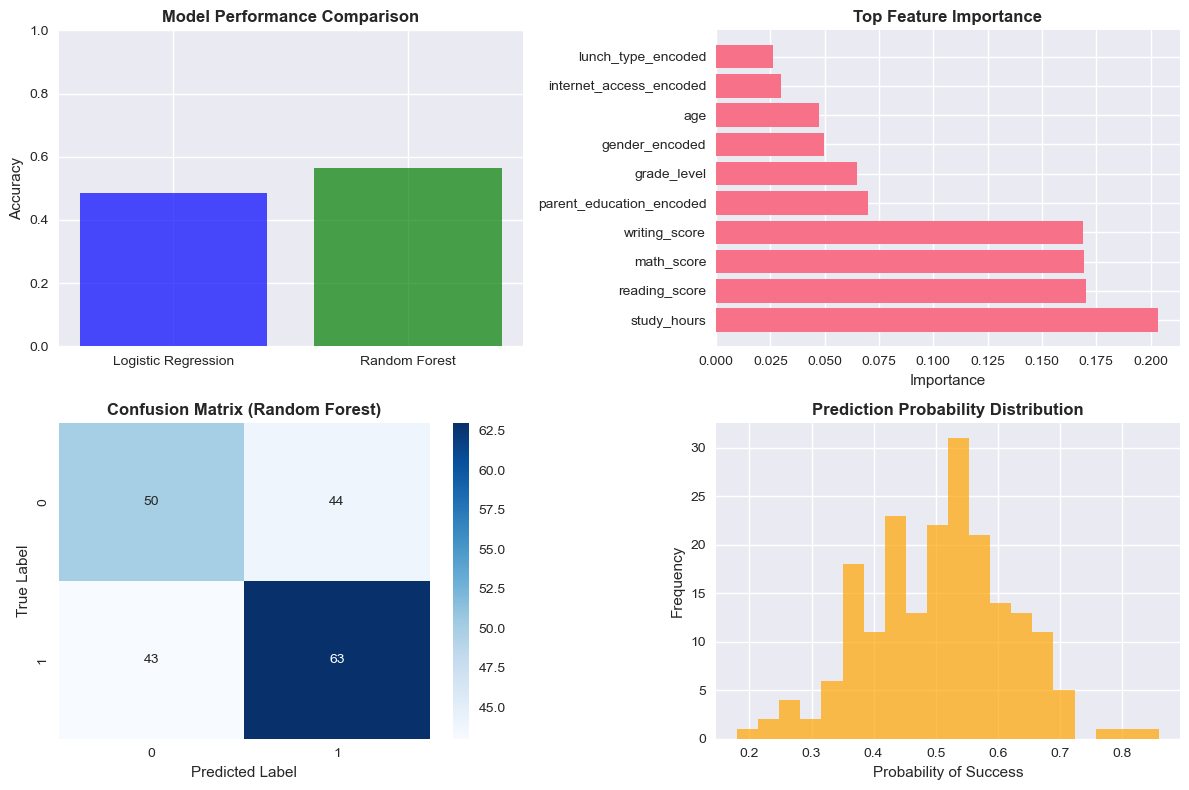

In [71]:
if len(ml_data) > 50:  # Ensure we have enough data
    X = ml_data[feature_columns]
    y = ml_data['success']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    # Logistic Regression
    print("\n1. LOGISTIC REGRESSION")
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    
    print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, lr_pred))
    
    # Random Forest
    print("\n2. RANDOM FOREST")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, rf_pred))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance (Random Forest):")
    print(feature_importance)
    
    # Visualization of results
    plt.figure(figsize=(12, 8))
    
    # Model comparison
    plt.subplot(2, 2, 1)
    models = ['Logistic Regression', 'Random Forest']
    accuracies = [lr_accuracy, rf_accuracy]
    plt.bar(models, accuracies, color=['blue', 'green'], alpha=0.7)
    plt.title('Model Performance Comparison', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    
    # Feature importance plot
    plt.subplot(2, 2, 2)
    top_features = feature_importance.head(min(10, len(feature_importance)))
    plt.barh(top_features['feature'], top_features['importance'])
    plt.title('Top Feature Importance', fontsize=12, fontweight='bold')
    plt.xlabel('Importance')
    
    # Confusion matrix for Random Forest
    plt.subplot(2, 2, 3)
    cm = confusion_matrix(y_test, rf_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Random Forest)', fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Prediction probabilities distribution
    plt.subplot(2, 2, 4)
    rf_proba = rf_model.predict_proba(X_test)[:, 1]
    plt.hist(rf_proba, bins=20, alpha=0.7, color='orange')
    plt.title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Probability of Success')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [72]:
print("\n=== SUMMARY STATISTICS TABLE ===")


=== SUMMARY STATISTICS TABLE ===


In [74]:
# Create comprehensive summary table
summary_stats = pd.DataFrame()

In [75]:
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'attendance', 'study_hours', 'age']
for col in numeric_cols:
    if col in df_analysis.columns:
        summary_stats[col] = [
            df_analysis[col].count(),
            df_analysis[col].mean(),
            df_analysis[col].std(),
            df_analysis[col].min(),
            df_analysis[col].quantile(0.25),
            df_analysis[col].median(),
            df_analysis[col].quantile(0.75),
            df_analysis[col].max()
        ]

In [76]:
summary_stats.index = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']
print("\nDescriptive Statistics Summary:")
print(summary_stats.round(2))


Descriptive Statistics Summary:
         math_score  reading_score  writing_score  study_hours      age
Count       1000.00        1000.00        1000.00      1000.00  1000.00
Mean          75.17          74.29          75.15         2.98    16.00
Std Dev       14.30          14.31          14.40         1.17     0.82
Min           50.00          50.00          50.00         1.02    15.00
25%           63.00          62.00          63.00         1.96    15.00
Median        75.00          74.00          75.00         2.96    16.00
75%           88.00          86.00          88.00         3.99    17.00
Max           99.00          99.00          99.00         5.00    17.00


In [78]:
# Success rate by categorical variables
print("\n=== SUCCESS RATES BY CATEGORIES ===")
categorical_vars = ['gender', 'parent_education', 'internet_access', 'lunch_type', 'extracurricular']


=== SUCCESS RATES BY CATEGORIES ===


In [79]:
for var in categorical_vars:
    if var in df_analysis.columns:
        success_rates = df_analysis.groupby(var)['success'].agg(['count', 'mean', 'std']).round(3)
        print(f"\nSuccess Rate by {var.replace('_', ' ').title()}:")
        print(success_rates)


Success Rate by Gender:
        count   mean    std
gender                     
Female    326  0.509  0.501
Male      355  0.515  0.500
Other     319  0.527  0.500

Success Rate by Parent Education:
                  count   mean    std
parent_education                     
Bachelor's          274  0.507  0.501
High School         245  0.547  0.499
Master's            227  0.493  0.501
PhD                 254  0.520  0.501

Success Rate by Internet Access:
                 count   mean  std
internet_access                   
No                 500  0.512  0.5
Yes                500  0.522  0.5

Success Rate by Lunch Type:
                 count   mean  std
lunch_type                        
Free or reduced    498  0.522  0.5
Standard           502  0.512  0.5


In [80]:
print("\n=== ANALYSIS COMPLETE ===")
print("\nKey Findings Summary:")
print("1. Exploratory data analysis completed with multiple visualizations")
print("2. Statistical hypothesis tests performed for key relationships")
print("3. Machine learning models trained and evaluated")
print("4. Comprehensive statistical summaries generated")
print("\nAll visualizations and statistical tests are ready for inclusion in your scientific article.")
print("Remember to interpret the results in the context of your research questions!")


=== ANALYSIS COMPLETE ===

Key Findings Summary:
1. Exploratory data analysis completed with multiple visualizations
2. Statistical hypothesis tests performed for key relationships
3. Machine learning models trained and evaluated
4. Comprehensive statistical summaries generated

All visualizations and statistical tests are ready for inclusion in your scientific article.
Remember to interpret the results in the context of your research questions!


In [82]:
# Export key results to CSV for further analysis
results_summary = {
    'Total_Students': len(df_analysis),
    'Success_Rate': df_analysis['success'].mean(),
    'Average_Math_Score': df_analysis['math_score'].mean() if 'math_score' in df_analysis.columns else 'N/A',
    'Average_Attendance': df_analysis['attendance'].mean() if 'attendance' in df_analysis.columns else 'N/A',
}

In [83]:
print(f"\nKey Metrics:")
for key, value in results_summary.items():
    if isinstance(value, float):
        print(f"{key}: {value:.3f}")
    else:
        print(f"{key}: {value}")


Key Metrics:
Total_Students: 1000
Success_Rate: 0.517
Average_Math_Score: 75.165
Average_Attendance: N/A
